In [ ]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

In [ ]:
!pip install findspark
!pip install pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession 
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
sqlContext
sc   

<SparkContext master=local[*] appName=ml-bank>

In [ ]:
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [ ]:
!ls

'bank (1).csv'	 spark-2.4.0-bin-hadoop2.7
'bank (2).csv'	 spark-2.4.0-bin-hadoop2.7.tgz
'bank (3).csv'	 spark-2.4.0-bin-hadoop2.7.tgz.1
'bank (4).csv'	 spark-2.4.0-bin-hadoop2.7.tgz.2
 bank.csv	 spark-2.4.0-bin-hadoop2.7.tgz.3
 sample_data	 spark-warehouse


In [ ]:
import pandas as pd
bankd = pd.read_csv('bank.csv')
bankd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Import the 'bank.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('bank.csv', header = True, inferSchema = True)  
df.show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  

In [ ]:
# Check data distribution
# You may use printSchema()

df.printSchema()
stats = [a[0] for a in df.dtypes if a[1] == 'int']
df.select(stats).describe().toPandas().transpose()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



,0,1,2,3,4
summary,count,mean,stddev,min,max
age,11162,41.231947679627304,11.913369192215518,18,95
balance,11162,1528.5385235620856,3225.413325946149,-6847,81204
day,11162,15.658036194230425,8.420739541006462,1,31
duration,11162,371.99381831213043,347.12838571630687,2,3881
campaign,11162,2.508421429851281,2.7220771816614824,1,63
pdays,11162,51.33040673714388,108.75828197197717,-1,854
previous,11162,0.8325568894463358,2.292007218670508,0,58


#Select features

In [ ]:
#Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2
df2=df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')
df2.show()


In [ ]:
#remove invalid rows/records using spark.sql
df2.registerTempTable("bank")
df2=spark.sql("SELECT * FROM bank WHERE job <> 'unknown' AND education <> 'unknown' AND poutcome <> 'unknown' AND poutcome <> 'other'") 
df2.show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|s

In [ ]:
#Covert categorical features to numeric features using One hot encoding
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator
from pyspark.ml.feature import VectorAssembler

strindexer=[StringIndexer(inputCol=column, outputCol=column+"_index").fit(df2) for column in list(set(df2.columns)-set(['age', 'balance', 'campaign', 'pdays', 'previous','deposit']))]

pipeline=Pipeline(stages=strindexer)
df2=pipeline.fit(df2).transform(df2)

OneHencoder=OneHotEncoderEstimator(inputCols=["housing_index", "marital_index", "default_index", "loan_index", "job_index", "education_index", "poutcome_index"],
                              outputCols=["housing_vec", "marital_vec", "default_vec", "loan_vec", "job_vec", "education_vec", "poutcome_vec"])
 
model_OneHencoder=OneHencoder.fit(df2)
df2=model_OneHencoder.transform(df2)
 
df2=df2.select([column for column in df2.columns if column not in ["housing", "marital", "default", "loan", "job", "education", "poutcome", 
                                                                  "housing_index", "marital_index", "default_index", "loan_index", "job_index", "education_index", "poutcome_index"]])
 
assembler=VectorAssembler(inputCols=["age", "balance", "campaign", "pdays", "previous", "job_vec", "education_vec", "marital_vec", "poutcome_vec", "housing_vec", "loan_vec", "default_vec"], outputCol="features")
df2=assembler.transform(df2)
   
featurdf=df2.select("features")

featurdf.printSchema()
 
from pyspark.ml.feature import StringIndexer
depo_df=df2.select("deposit")
indexer=StringIndexer(inputCol="deposit", outputCol="deposit_index")
depo_df=indexer.fit(depo_df).transform(depo_df)
 
y=depo_df.select('deposit_index')
 
y.printSchema()


root
 |-- features: vector (nullable = true)

root
 |-- deposit_index: double (nullable = false)



In [ ]:
#Apply Min-Max normalisation on each attribute using MinMaxScaler  
from pyspark.ml.feature import MinMaxScaler
from pyspark.sql.functions import monotonically_increasing_id 

minmaxscale = MinMaxScaler(inputCol="features",outputCol="ScaledFeature")
scalermodel= minmaxscale.fit(df2)
normalised=scalermodel.transform(df2)
print("Range of feautures: [%f, %f]" % (minmaxscale.getMin(), minmaxscale.getMax()))

X=normalised.select("ScaledFeature")
X.show(truncate=False)

X_index = X.select("*").withColumn("id", monotonically_increasing_id())
y_index = y.select("*").withColumn("id", monotonically_increasing_id())
 

model_d = y_index.join(X_index, "id", "outer").drop("id") 


Range of feautures: [0.000000, 1.000000]
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ScaledFeature                                                                                                                                                                  |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.21428571428571427,0.05334664361715079,0.0,0.10550996483001172,0.05555555555555555,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0]                  |
|[0.5428571428571428,0.018589759197487277,0.0,0.17116060961313012,0.018518518518518517,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0]                 |
|[0.22857142857142856,0.02236371162133866,0.0,0.1981242672919109,0.03

# 4.Unsupervised learning

## 4.1 K-means

In [ ]:
# perform unsupervised learning on df2 with k-means 
# you can use whole df2 as both training and testing data, 
# evaluate the clustering result using Accuracy.
StructData= data_model.toDF('label','features')
StructData.show()
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
kmeanset = KMeans(featuresCol='features').setK(2).setSeed(1)
k_model = kmeanset.fit(StructData)
kprediction = k_model.transform(StructData)

from pyspark.sql.types import DoubleType
kprediction = kprediction.withColumn("prediction",kprediction.prediction.cast(DoubleType()))

kmean_evaluator = MulticlassClassificationEvaluator()
print(" accuracy of k means is",kmean_evaluator.evaluate(kmeans_prediction))


+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[0.32857142857142...|
|  0.0|[0.18571428571428...|
|  0.0|[0.55714285714285...|
|  0.0|[0.27142857142857...|
|  1.0|[0.57142857142857...|
|  1.0|[0.28571428571428...|
|  1.0|[0.17142857142857...|
|  1.0|[0.27142857142857...|
|  1.0|[0.28571428571428...|
|  0.0|[0.2,0.0149984173...|
|  0.0|[0.24285714285714...|
|  0.0|[0.1,0.0212558739...|
|  0.0|[0.48571428571428...|
|  0.0|[0.34285714285714...|
|  0.0|[0.22857142857142...|
|  0.0|[0.52857142857142...|
|  0.0|[0.21428571428571...|
|  0.0|[0.2,0.0121983881...|
|  0.0|[0.04285714285714...|
|  1.0|[0.38571428571428...|
+-----+--------------------+
only showing top 20 rows

 accuracy of k means is 0.5438051682557494


## PCA

+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------+
|label|features                                                                                                                                                                      |PCA                                       |
+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------+
|0.0  |[0.32857142857142857,0.010274889824937303,0.0,0.23681125439624853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0]                                |[0.7645722111920759,-0.4948702464771579]  |
|0.0  |[0.18571428571428572,0.1679408828613864,0.0,0.10668229777256741,0.0,1.0,0.0,0.0,0.0,0.0,0

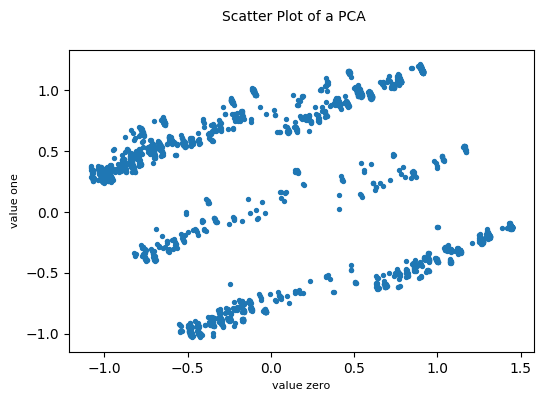

In [ ]:
#Generate a scatter plot using the first two PCA components to investigate the data distribution.
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
import matplotlib.pyplot as plt
import numpy as np

pcam = PCA(k=2, inputCol="features", outputCol="PCA")

smodel = pcam.fit(StructData)
Transformedpca = smodel.transform(StructData)

Transformedpca.show(truncate=False)

pca_arr = np.array(Transformedpca.select('PCA').collect())

np_pca = pca_arr[ :, 0, :]


plt.figure(dpi=100)
plt.suptitle('Scatter Plot of a PCA', fontsize=10)
plt.xlabel('value zero', fontsize=8)
plt.ylabel('value one', fontsize=8)
plt.scatter(np_pca[:,0], np_pca[:,1], s=8, alpha=1)


# Supervised learning

In [ ]:
train, test = DataStructured.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1515
Test Dataset Count: 666


## LogisticRegression

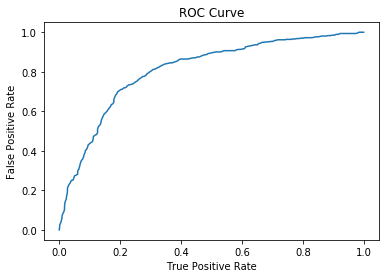

Training set area Under ROC: 0.8077294960755322


In [ ]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
LogiRegression = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=11)
LogiRegression_Model = LogiRegression.fit(train)

trainingSummary = LogiRegression_Model.summary

Reg_of_Coff = trainingSummary.roc.toPandas()
plt.plot(Reg_of_Coff['FPR'],Reg_of_Coff['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set area Under ROC: ' + str(trainingSummary.areaUnderROC))



In [ ]:
#Examining the coefficients
predictionmodel = LogiRegression_Model.transform(test)
coeff = LogiRegression_Model.coefficients
print(coeff)
predictionmodel.select('label', 'features', 'rawPrediction', 'prediction', 'probability').show(8)

#Evaluation

from pyspark.ml.evaluation import BinaryClassificationEvaluator
l_evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', l_evaluator.evaluate(predictionmodel))


[0.13689597112117666,-2.5837338482359336,1.5452900165335877,0.10914129771779066,-2.1304296585478935,-0.10872337597810097,0.09387538383735257,0.17454801032134934,0.38687217716637085,-0.20896984785011807,0.04141215378634817,-0.7042791423214274,-0.5332218321469641,0.20406177723049054,0.28138997259438686,-0.10169692776632434,-0.13935289202489384,-0.07798615972264007,-0.01948673645023536,1.839217349913693,-0.7825486402138115,-0.4132842592947089,-0.3177311180790536]
+-----+--------------------+--------------------+----------+--------------------+
|label|            features|       rawPrediction|prediction|         probability|
+-----+--------------------+--------------------+----------+--------------------+
|  0.0|[0.18571428571428...|[2.17740103643224...|       0.0|[0.89820168058575...|
|  0.0|[0.55714285714285...|[0.40776777411000...|       0.0|[0.60055251237116...|
|  1.0|[0.28571428571428...|[-0.1331764630573...|       1.0|[0.46675500573649...|
|  0.0|[0.21428571428571...|[-0.37657528796

##Decision tree

In [ ]:
#Decision tree
from pyspark.ml.classification import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dectreemodel = dec_tree.fit(train)
predictions_b = dectreemodel.transform(test)
predictions_b.select('label', 'features', 'rawPrediction', 'prediction', 'probability').show(8)
Decision_T_evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(Decision_T_evaluator.evaluate(predictions, {Decision_T_evaluator.metricName: "areaUnderROC"})))

+-----+--------------------+-------------+----------+--------------------+
|label|            features|rawPrediction|prediction|         probability|
+-----+--------------------+-------------+----------+--------------------+
|  0.0|[0.18571428571428...| [632.0,64.0]|       0.0|[0.90804597701149...|
|  0.0|[0.55714285714285...|[220.0,110.0]|       0.0|[0.66666666666666...|
|  1.0|[0.28571428571428...|[162.0,290.0]|       1.0|[0.35840707964601...|
|  0.0|[0.21428571428571...|[162.0,290.0]|       1.0|[0.35840707964601...|
|  0.0|[0.21428571428571...|[220.0,110.0]|       0.0|[0.66666666666666...|
|  0.0|[0.65714285714285...| [632.0,64.0]|       0.0|[0.90804597701149...|
|  1.0|[0.52857142857142...|[220.0,110.0]|       0.0|[0.66666666666666...|
|  0.0|[0.2,0.0141584086...|[162.0,290.0]|       1.0|[0.35840707964601...|
|  0.0|[0.31428571428571...|[162.0,290.0]|       1.0|[0.35840707964601...|
|  0.0|[0.32857142857142...| [632.0,64.0]|       0.0|[0.90804597701149...|
+-----+------------------

#NaiveBayes

In [ ]:
#NaiveBayes
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

bayes = NaiveBayes(featuresCol = 'features', labelCol = 'label')

bayesmodel = bayes.fit(train)

bayesPredictions = bayesmodel.transform(test)

bayesPredictions.select('label', 'features', 'rawPrediction', 'prediction', 'probability').show(8)

Naive_evaluator = BinaryClassificationEvaluator()
evaluator = MulticlassClassificationEvaluator()
ROC_accuracy =Naive_evaluator.evaluate(bayesPredictions)
acc = evaluator.evaluate(bayesPredictions)
print("Test set under ROC = " + str(ROC_accuracy))
print("Test set accuracy = " + str(acc))

+-----+--------------------+--------------------+----------+--------------------+
|label|            features|       rawPrediction|prediction|         probability|
+-----+--------------------+--------------------+----------+--------------------+
|  0.0|[0.18571428571428...|[-14.783775233728...|       0.0|[0.84410063258126...|
|  0.0|[0.55714285714285...|[-19.048538920690...|       0.0|[0.74878757430767...|
|  1.0|[0.28571428571428...|[-18.398229673645...|       0.0|[0.58751182730099...|
|  0.0|[0.21428571428571...|[-17.990454520573...|       1.0|[0.41573954066616...|
|  0.0|[0.21428571428571...|[-19.611940391948...|       0.0|[0.82906266777012...|
|  0.0|[0.65714285714285...|[-20.015253792344...|       0.0|[0.93162729210364...|
|  1.0|[0.52857142857142...|[-21.444464827817...|       0.0|[0.82524335053180...|
|  0.0|[0.2,0.0141584086...|[-17.615862065040...|       1.0|[0.30220553421147...|
|  0.0|[0.31428571428571...|[-18.585433793006...|       0.0|[0.58310791765286...|
|  0.0|[0.328571